In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings  # Ignores any warning
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv("bigdatamart_Train.csv")
test = pd.read_csv("bigdatamart_Test.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Checking null values in the dataframe

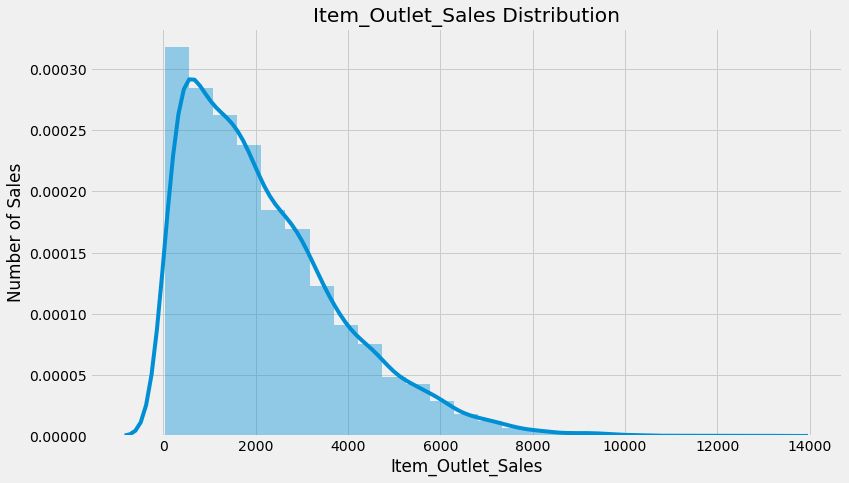

In [5]:
# Distribution of item outlet sales
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12, 7))
sns.distplot(train.Item_Outlet_Sales, bins=25)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0, 1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")
plt.show()  

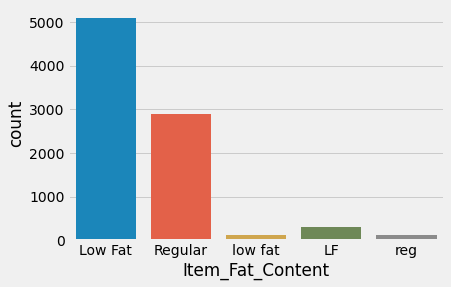

In [6]:
# Distribution of fat content
sns.countplot(train.Item_Fat_Content)
plt.show()  

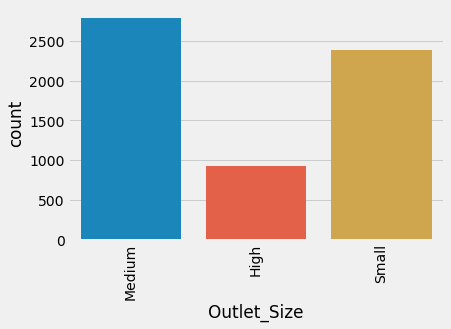

In [7]:
# Distribution of outlet size
sns.countplot(train.Item_Type)
plt.xticks(rotation=90)
sns.countplot(train.Outlet_Size)
plt.show()  

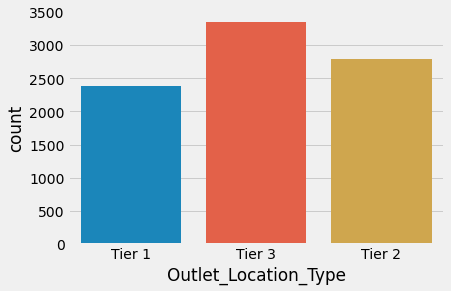

In [8]:
# Distribution of outlet location type
sns.countplot(train.Outlet_Location_Type)
plt.show()  

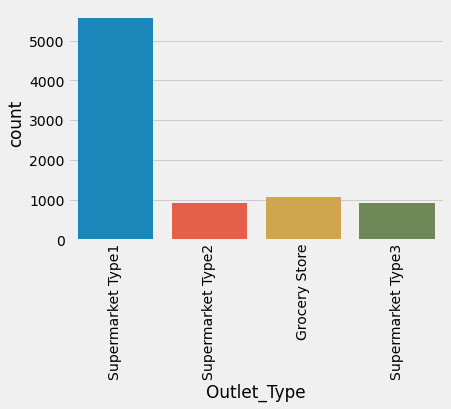

In [9]:
 # Distribution of outlet type
sns.countplot(train.Outlet_Type)
plt.xticks(rotation=90)
plt.show() 

### Join Train and Test Dataset

In [10]:
# Create source column to later separate the data easily
train['source'] = 'train'
test['source'] = 'test'

In [11]:
data = pd.concat([train, test], ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [12]:
# Create table with identifiers and its weights and ignores the NaN values
item_avg_weight = data.pivot_table(values='Item_Weight', index='Item_Identifier')

In [13]:
# Filling null values with mean
def impute_weight(cols):  
    Weight = cols[0]
    Identifier = cols[1]

    if pd.isnull(Weight):
        return item_avg_weight['Item_Weight'][item_avg_weight.index == Identifier]
    else:
        return Weight

In [14]:
print ('Orignal missing: %d' % sum(data['Item_Weight'].isnull()))
print (data['Item_Weight'].mean())

Orignal missing: 2439
12.792854228644991


In [15]:
data['Item_Weight'] = data[['Item_Weight', 'Item_Identifier']].apply(impute_weight, axis=1).astype(float)

In [16]:
print ('Final missing: %d' % sum(data['Item_Weight'].isnull()))

Final missing: 0


In [17]:
print (data['Item_Weight'].mean())

12.793380385807628


In [18]:
from scipy.stats import mode

# Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=lambda x: x.mode())


def impute_size_mode(cols):  # Same as above but using mode
    Size = cols[0]
    Type = cols[1]
    if pd.isnull(Size):
        return outlet_size_mode.loc['Outlet_Size'][outlet_size_mode.columns == Type][0]
    else:
        return Size


In [19]:
print ('Orignal missing: %d' % sum(data['Outlet_Size'].isnull()))
data['Outlet_Size'] = data[['Outlet_Size', 'Outlet_Type']].apply(impute_size_mode, axis=1)
print ('Final missing: %d' % sum(data['Outlet_Size'].isnull()))

Orignal missing: 4016
Final missing: 0


In [20]:
visibility_item_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [21]:
def impute_visibility_mean(cols):
    visibility = cols[0]
    item = cols[1]
    if visibility == 0:
        return visibility_item_avg['Item_Visibility'][visibility_item_avg.index == item]
    else:
        return visibility
    
print ('Original zeros: %d' % sum(data['Item_Visibility'] == 0))
data['Item_Visibility'] = data[['Item_Visibility', 'Item_Identifier']].apply(impute_visibility_mean, axis=1).astype(float)


Original zeros: 879


In [22]:
print ('Final zeros: %d' % sum(data['Item_Visibility'] == 0))

Final zeros: 0


In [23]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [25]:
# Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [26]:
# Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD': 'Food', 'NC': 'Non-Consumable', 'DR': 'Drinks'})

In [27]:
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [29]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular','low fat': 'Low Fat'})

In [30]:
data.loc[data['Item_Type_Combined'] == "Non-Consumable", 'Item_Fat_Content'] = "Non-Edible"

In [31]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [32]:
def func(x): return x['Item_Visibility'] / visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]

In [33]:
data['Item_Visibility_MeanRatio'] = data.apply(func, axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content', 'Outlet_Location_Type', 'Outlet_Size', 'Item_Type_Combined', 'Outlet_Type', 'Outlet']

for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [35]:
# Exporting the data back

# Drop the columns which have been converted to different types:
data.drop(['Item_Type', 'Outlet_Establishment_Year'], axis=1, inplace=True)

In [36]:
# Divide into test and train:
train = data.loc[data['source'] == "train"]
test = data.loc[data['source'] == "test"]

In [37]:
# Drop unnecessary columns:
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace=True)
train.drop(['source'], axis=1, inplace=True)

In [39]:
# Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier', 'Outlet_Identifier']

In [49]:
# Linear Regression model
from sklearn.linear_model import LinearRegression
LR = LinearRegression(normalize=True)

predictors = train.columns.drop(['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'])
modelfit(LR, train, test, predictors, target, IDcol, 'LR.csv')


Model Report
RMSE : 1.4e+07


In [50]:
# Decision Tree model
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(DT, train, test, predictors, target, IDcol, "DT.csv")


Model Report
RMSE : 1.4e+07


In [51]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train, test, predictors, target, IDcol, "RF.csv")


Model Report
RMSE : 1.4e+07


In [60]:
#cross_val_score method
lm = LinearRegression()


Sq_train=(train[target])**2

cv_score = cross_val_score(lm, train[predictors], Sq_train, cv=20, scoring='neg_mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))
cv_score

array([ 9923737.26767546,  8706291.33291326,  9883439.27445387,
        9722041.44960454,  8747565.14562989,  8709846.17135516,
        7866941.92453714,  9532197.07416506,  8373925.36575851,
        7941783.73891882,  9895209.67260276,  9848944.41639449,
       10574430.4386015 ,  8417847.62675239,  8226343.39603128,
       10291986.98605067, 11901264.31009334,  8387776.19515809,
       10217589.38492155,  8258939.869652  ])

In [61]:
print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score), np.std(cv_score), np.min(cv_score), np.max(cv_score)))

CV Score : Mean - 9.271e+06 | Std - 1.035e+06 | Min - 7.867e+06 | Max - 1.19e+07
